## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [4]:
# you code here
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random
%matplotlib inline


In [2]:
random_data = np.random.random((30,2))

In [3]:
X = random_data[:,0]
y = random_data[:,1]

In [36]:
def func(X):
    return 7.3*X + 9 + random.randint(-2,2)

In [38]:
y = [func(x) for x in X]

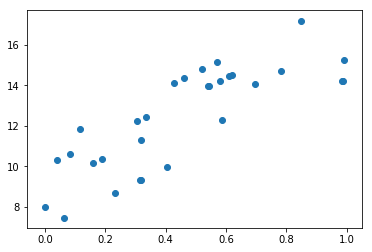

In [39]:
plt.scatter(X,y)

In [44]:
reg = LinearRegression().fit(X.reshape(-1,1),y)

In [46]:
reg.score(X.reshape(-1,1),y)

0.6541092842544374

In [48]:
y_pred = reg.predict(X.reshape(-1,1))

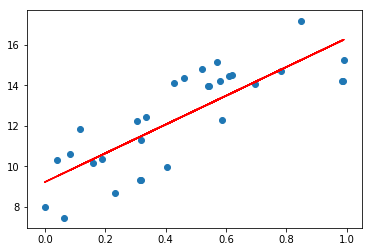

In [54]:
plt.scatter(X,y)
plt.plot(X,y_pred,color = 'r')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [56]:
from scipy.spatial.distance import cosine

In [57]:
# you code here
def model(X,y):
    return [(Xi,yi) for Xi,yi in zip(X,y)]

In [58]:
def distance(x1,x2):
    return cosine(x1,x2)

In [64]:
def predict(x, k=5):
    most_similar = sorted(model(X,y), key = lambda xi: distance(xi[0],x))[:k]
    y_pred = sum(p[1] for p in most_similar)/k
    return y_pred

In [71]:
predict(X[1])

12.783617069169434

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [74]:
from collections import Counter
from icecream import ic

In [78]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [73]:
# you code here
def entropy(elements):
    count = Counter(elements)
    probs = [count[c]/len(elements) for c in set(elements)]
    return sum(-p * np.log(p) for p in probs)

In [81]:
set(pd.DataFrame(mock_data).columns.tolist())-{'gender'}

{'bought', 'family_number', 'income'}

In [95]:
def find_min_spliter(trainingdata: pd.DataFrame, target: str) -> str:
    x_fields = set(trainingdata.columns.tolist())-{target}
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(trainingdata[f]) 
        ic(values)
        for v in values:
            sub_spliter_1 = trainingdata[trainingdata[f] == v][target].tolist()
            ic(sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            sub_spliter_2 = trainingdata[trainingdata[f] != v][target].tolist()
            ic(sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v < min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
                
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    return spliter

In [96]:
find_min_spliter(pd.DataFrame(mock_data), 'bought')

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 1, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [0, 0, 1]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_spliter_1: [1, 1]
ic| entropy_1: 0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: 0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: 0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| entropy_1: 0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.67301166700

spliter is: ('income', '-10')
the min entropy is: 0.6730116670092565


('income', '-10')

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [97]:
from sklearn.cluster import KMeans
import random

In [98]:
X = [random.randint(0,100) for _ in range(100)]
Y = [random.randint(0,100) for _ in range(100)]

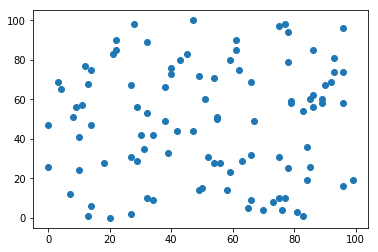

In [101]:
plt.scatter(X,Y)

In [107]:
train_data = [[x,y] for x, y in zip(X,Y)]

In [108]:
train_data[:1]

[[31, 35]]

In [112]:
cluster = KMeans(n_clusters=5,max_iter = 500)

In [113]:
cluster.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [114]:
cluster.cluster_centers_

array([[70.96      , 17.6       ],
       [50.0952381 , 69.33333333],
       [22.05882353, 21.82352941],
       [15.82352941, 67.29411765],
       [86.3       , 71.95      ]])

In [115]:
from collections import defaultdict

In [116]:
centers = defaultdict(list)

In [119]:
for label, location in zip(cluster.labels_, train_data):
    centers[label].append(location)

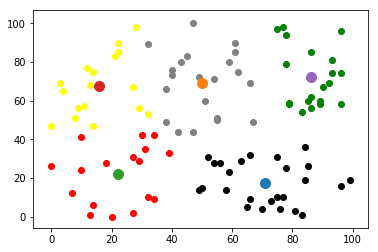

In [126]:
color = ['red','green','grey','black','yellow']

for i,c in enumerate(centers):
    #print(i,c)
    for location in centers[c]:
        plt.scatter(*location,c = color[i])

for center in cluster.cluster_centers_:
    plt.scatter(*center,s = 100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: Model is built based on historial data and can be used to explain a certain pattern and make prediction when new data point comes in. Since all models are built on previous data or samples, it can never provide the information for furture situation once things change. However, some models can be useful if there is a pattern for a certain group of data and can be captured by model, then we could use these modelse to make prediction of other data points which are in the same distribution. 

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans: underfitting is a model can not capture a certain trend of the data, it shows low variance but high bias. Underfitting is oftern a reason of very simple model.

Overfitting happens when a model fit the data so well that it even capture the noise of those training data samples, it shows low bias but high variance.And it's usually caused by a much complicated model or the training data is not well samples so that can not represent the whole distribution. 

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

<Ans >:
> + precision: is the fraction of relevant instances among the retrieved instances. It's the fraction of true positives counts with all predicted positives counts
+ recal : is the fraction of the total amount of relevant instances that were actually retrieved. It's the fraction true posiitivese counts with all real positives counts
+ AUC: it's the area under ROC curve. It measures the performance of a certain model at various threshold settings, and tells how much a model is capable of distinguishing between classes. The higher the AUC, the better the model predict. 
+ F1: it's a harmonic mean of precision and recall , it's a measure of test's accuracy.
+ F2: is the situation when βin F-score generation formula is set to 2.The intuition behind the F2 score is that it weights recall higher than precision. This makes the F2 score more suitable in certain applications where it’s more important to classify correctly as many positive samples as possible, rather than maximizing the number of correct classifications.

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [127]:
# you code here

In [135]:
def predicate(dataset,gender, income, family_number):
    params = {'gender':gender, 'income':income, 'family_number':family_number}
    min_spliter_1= find_min_spliter(dataset, 'bought')
    f_1,v_1 = min_spliter_1[0],min_spliter_1[1]
    
    if params[f_1] == v_1:
        return dataset[dataset[f_1] == v_1]['bought'].unique().tolist()[0]
    else:
        return predicate(dataset[dataset[f_1] != v_1],gender, income, family_number)

In [140]:
predicate(dataset,'F',10,1)

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 1, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [0, 0, 1]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_spliter_1: [1, 1]
ic| entropy_1: 0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: 0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: 0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| entropy_1: 0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.67301166700

spliter is: ('income', '-10')
the min entropy is: 0.6730116670092565


]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| f: 'income'
ic| values: {'+10'}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: []
ic| entropy_2: 0
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [1]
ic| entropy_2: 0.0
ic| entropy_v: 0.5623351446188083
ic| sub_spliter_1: [1]
ic| entropy_1: 0.0
ic| sub_spliter_2: [1, 0, 0, 0]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083


spliter is: ('family_number', 1)
the min entropy is: 0.5623351446188083


1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [141]:
# you code here
from sklearn.datasets import load_boston
import random

In [142]:
dataset = load_boston()
x,y = dataset['data'],dataset['target']

In [145]:
def loss(y,y_hat):
    return sum(abs(y_i-y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y)) 

In [147]:
def price(rm,k,b):
    return k*rm+b

In [157]:
def grad_k(x,y,y_hat):
    n = len(y)
    grad = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if k*x_i+b < y_i:       
            grad += -x_i
        elif k*x_i > y_i:
            grad += x_i
        else:
            grad += 0
    return grad/n

def grad_b(x,y,y_hat):
    n = len(y)
    grad = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if k*x_i+b < y_i:       
            grad += -1
        elif k*x_i > y_i:
            grad += 1
        else:
            grad += 0
    return grad/n

In [155]:
X_rm = x[:,5]

In [164]:
k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-2

iteration_num = 1000 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = grad_k(X_rm, y, price_use_current_parameters)
    b_gradient = grad_b(X_rm,y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 300.1555758490754, parameters k is 55.75142995280319 and b is -27.68897165223487
Iteration 1, the loss is 299.7506095552487, parameters k is 55.688583608929676 and b is -27.69897165223487
Iteration 2, the loss is 299.3456432614217, parameters k is 55.62573726505616 and b is -27.708971652234872
Iteration 3, the loss is 298.940676967595, parameters k is 55.56289092118264 and b is -27.718971652234874
Iteration 4, the loss is 298.53571067376794, parameters k is 55.500044577309126 and b is -27.728971652234875
Iteration 5, the loss is 298.1307443799413, parameters k is 55.43719823343561 and b is -27.738971652234877
Iteration 6, the loss is 297.7257780861143, parameters k is 55.37435188956209 and b is -27.74897165223488
Iteration 7, the loss is 297.3208117922876, parameters k is 55.311505545688576 and b is -27.75897165223488
Iteration 8, the loss is 296.91584549846056, parameters k is 55.24865920181506 and b is -27.76897165223488
Iteration 9, the loss is 296.510879204

Iteration 134, the loss is 245.89009247627885, parameters k is 47.33001987375195 and b is -29.02897165223508
Iteration 135, the loss is 245.485126182452, parameters k is 47.267173529878434 and b is -29.03897165223508
Iteration 136, the loss is 245.0801598886252, parameters k is 47.20432718600492 and b is -29.048971652235082
Iteration 137, the loss is 244.67519359479826, parameters k is 47.1414808421314 and b is -29.058971652235083
Iteration 138, the loss is 244.27022730097164, parameters k is 47.078634498257884 and b is -29.068971652235085
Iteration 139, the loss is 243.8652610071446, parameters k is 47.01578815438437 and b is -29.078971652235087
Iteration 140, the loss is 243.4602947133179, parameters k is 46.95294181051085 and b is -29.088971652235088
Iteration 141, the loss is 243.05532841949085, parameters k is 46.890095466637334 and b is -29.09897165223509
Iteration 142, the loss is 242.650362125664, parameters k is 46.82724912276382 and b is -29.10897165223509
Iteration 143, the 

Iteration 265, the loss is 192.839507984963, parameters k is 39.09714882632126 and b is -30.338971652235283
Iteration 266, the loss is 192.4345416911359, parameters k is 39.03430248244774 and b is -30.348971652235285
Iteration 267, the loss is 192.02957539730912, parameters k is 38.971456138574226 and b is -30.358971652235287
Iteration 268, the loss is 191.6246091034825, parameters k is 38.90860979470071 and b is -30.368971652235288
Iteration 269, the loss is 191.21964280965543, parameters k is 38.84576345082719 and b is -30.37897165223529
Iteration 270, the loss is 190.81467651582875, parameters k is 38.782917106953676 and b is -30.38897165223529
Iteration 271, the loss is 190.40971022200176, parameters k is 38.72007076308016 and b is -30.398971652235293
Iteration 272, the loss is 190.0047439281747, parameters k is 38.65722441920664 and b is -30.408971652235294
Iteration 273, the loss is 189.59977763434804, parameters k is 38.594378075333125 and b is -30.418971652235296
Iteration 274,

Iteration 409, the loss is 134.524361673898, parameters k is 30.04727530853485 and b is -31.77897165223551
Iteration 410, the loss is 134.11939538007104, parameters k is 29.984428964661333 and b is -31.78897165223551
Iteration 411, the loss is 133.7144290862443, parameters k is 29.921582620787817 and b is -31.79897165223551
Iteration 412, the loss is 133.30946279241735, parameters k is 29.8587362769143 and b is -31.808971652235513
Iteration 413, the loss is 132.90449649859062, parameters k is 29.795889933040783 and b is -31.818971652235515
Iteration 414, the loss is 132.49953020476372, parameters k is 29.733043589167266 and b is -31.828971652235516
Iteration 415, the loss is 132.0945639109368, parameters k is 29.67019724529375 and b is -31.838971652235518
Iteration 416, the loss is 131.68959761711005, parameters k is 29.607350901420233 and b is -31.84897165223552
Iteration 417, the loss is 131.28463132328318, parameters k is 29.544504557546716 and b is -31.85897165223552
Iteration 418,

Iteration 528, the loss is 86.33337270850437, parameters k is 22.56856038758636 and b is -32.96897165223535
Iteration 529, the loss is 85.92840641467755, parameters k is 22.505714043712842 and b is -32.97897165223535
Iteration 530, the loss is 85.52344012085074, parameters k is 22.442867699839326 and b is -32.98897165223535
Iteration 531, the loss is 85.11847382702399, parameters k is 22.38002135596581 and b is -32.99897165223535
Iteration 532, the loss is 84.71350753319707, parameters k is 22.317175012092292 and b is -33.008971652235346
Iteration 533, the loss is 84.30854123937023, parameters k is 22.254328668218776 and b is -33.018971652235344
Iteration 534, the loss is 83.90357494554337, parameters k is 22.19148232434526 and b is -33.02897165223534
Iteration 535, the loss is 83.49860865171647, parameters k is 22.128635980471742 and b is -33.03897165223534
Iteration 536, the loss is 83.0936423578897, parameters k is 22.065789636598225 and b is -33.04897165223534
Iteration 537, the lo

Iteration 676, the loss is 26.769412738012615, parameters k is 13.295587976519268 and b is -34.44252896448821
Iteration 677, the loss is 26.376908503724245, parameters k is 13.233709419207015 and b is -34.452331336029715
Iteration 678, the loss is 25.984404269435924, parameters k is 13.171830861894762 and b is -34.46213370757122
Iteration 679, the loss is 25.591900035147574, parameters k is 13.109952304582508 and b is -34.47193607911272
Iteration 680, the loss is 25.19939580085921, parameters k is 13.048073747270255 and b is -34.48173845065423
Iteration 681, the loss is 24.80689156657088, parameters k is 12.986195189958002 and b is -34.49154082219573
Iteration 682, the loss is 24.414387332282534, parameters k is 12.924316632645748 and b is -34.501343193737235
Iteration 683, the loss is 24.02188309799419, parameters k is 12.862438075333495 and b is -34.51114556527874
Iteration 684, the loss is 23.629378863705874, parameters k is 12.800559518021242 and b is -34.52094793682024
Iteration 6

Iteration 902, the loss is 4.443486681829786, parameters k is 9.193702245293952 and b is -35.10383331231441
Iteration 903, the loss is 4.443485193781181, parameters k is 9.193609340155612 and b is -35.10391236369781
Iteration 904, the loss is 4.443485584528291, parameters k is 9.193516435017273 and b is -35.10399141508121
Iteration 905, the loss is 4.443484755089596, parameters k is 9.19366301604494 and b is -35.10403094077291
Iteration 906, the loss is 4.443484329057499, parameters k is 9.1935701109066 and b is -35.10410999215631
Iteration 907, the loss is 4.4434843163980045, parameters k is 9.193716691934268 and b is -35.10414951784801
Iteration 908, the loss is 4.443483073586702, parameters k is 9.193623786795929 and b is -35.10422856923141
Iteration 909, the loss is 4.44348387770642, parameters k is 9.193770367823596 and b is -35.10426809492311
Iteration 910, the loss is 4.44348238965782, parameters k is 9.193677462685256 and b is -35.10434714630651
Iteration 911, the loss is 4.443

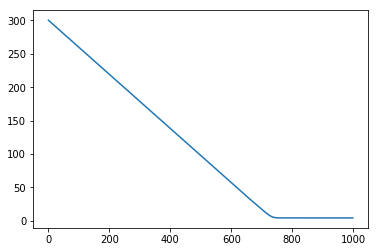

In [165]:
plt.plot(list(range(iteration_num)),losses)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)